# Kaprekars Constant

This notebooks provides implementation to validate Kaprekar's constant. While Kaprekar's constant is for 4 digit numbers, you can use this notebook to experiment with numbers of different digits.



Youtube Link : [https://www.youtube.com/watch?v=xtyNuOikdE4]



In [150]:
num_of_digits = 4
kaprekars_constant = 6174

def min_order(num, num_of_digits):
    num_arr = list(map(int, str(num).zfill(num_of_digits)))
    num_arr.sort()
    return int(''.join(map(str, num_arr)))

def max_order(num, num_of_digits):
    num_arr = list(map(int, str(num).zfill(num_of_digits)))
    num_arr.sort(reverse=True)
    return int(''.join(map(str, num_arr)))

def max_min_diff(num, num_of_digits):
    return max_order(num, num_of_digits) - min_order(num, num_of_digits)

def consistent_max_min_diff(num, num_of_digits, max_iter = 100):
    iter = 1
    old_diff = max_min_diff(num, num_of_digits)
    while(iter <= max_iter):
        new_diff = max_min_diff(old_diff, num_of_digits)
        if(new_diff == old_diff):
            break
        old_diff = new_diff
        iter = iter + 1
    return old_diff, iter  

def all_consistent_max_min_diff(num_of_digits):
    max_num = int('9'*num_of_digits)
    results = []
    for i in range(max_num):
        result = consistent_max_min_diff(i, num_of_digits)
        results.append(result)
    return results


In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def draw_plot(df):
    # Combined histogram and KDE plot for "First Value"
    warnings.filterwarnings('ignore')
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['diff'], kde=True, color='skyblue')
    plt.title('Combined Histogram and KDE of Diff')
    plt.xlabel('Diff')

    # Combined histogram and KDE plot for "Second Value"
    plt.subplot(1, 2, 2)
    sns.histplot(df['iter'], kde=True, color='lightgreen')
    plt.title('Combined Histogram and KDE of Iter')
    plt.xlabel('Iter')

    plt.tight_layout()
    plt.show()
    warnings.filterwarnings('default')



diff
6174    9990
0          9
Name: count, dtype: int64
iter
3    2400
7    2184
6    1656
5    1518
4    1272
2     576
1     393
Name: count, dtype: int64


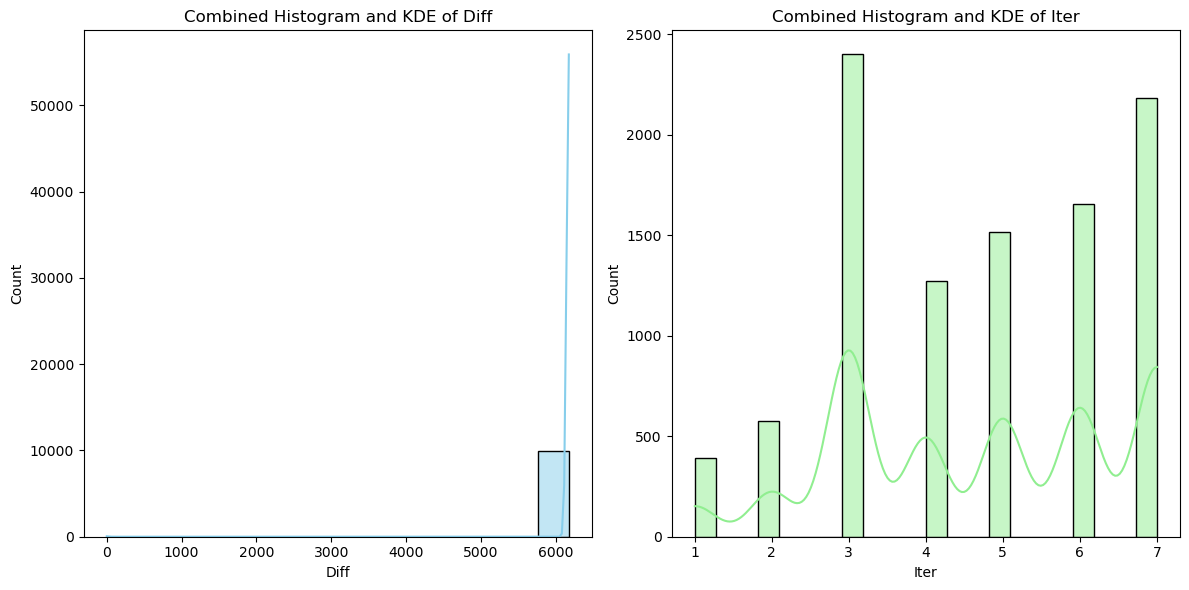

In [155]:

# For number of digits as 4,
# Try for other numbers like 3
results = all_consistent_max_min_diff(4)
df = pd.DataFrame(results, columns=['diff', 'iter'])
print(df['diff'].value_counts())
print(df['iter'].value_counts())
draw_plot(df)